![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

# Project Outline

### Task 1: Understand and learn the dataset.
### Task 2: Clean the Data as best as possible.
### Task 3: Analyze Extremely and Visualize your insights.
### Task 4: Build Machine Learning models to cluster customers.
### Task 5: After clustering, analyze why each sample in the same cluster is alike, and how is each cluster different from the other clusters.
### Bonus: Feature Selection and Engineering, Use Plotly for visualizations.

# Team 6:

* Nour Madkour
* Nour Sameh
* Ali AbdelHady
* Mohamed Mostafa

# Importing libraries and Reading Data

In [8]:

import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data analysis libraries
from scipy import stats
from scipy.stats import norm

# Preprocessing
from sklearn.preprocessing import RobustScaler

# Set up the matplotlib backend for inline plotting
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/bank.csv')

##Data Description
 * **age:** Age of the individual.
 * **job:** Occupation or job of the individual.
 * **marital:** Marital status of the individual.
 * **education:** Level of education attained by the individual.
 * **default:** Whether the individual has credit in default or not.
 * **balance:** Balance in the individual's bank account.
 * **housing:** Whether the individual has a housing loan or not.
 * **loan:** Whether the individual has a personal loan or not.
 * **contact:** Type of communication contact.
 * **day:** Day of the month when the contact was made.
 * **month:** Month of the year when the contact was made.
 * **duration:**last contact duration, in seconds (numeric).This input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 * **campaign:** Number of contacts performed during this campaign for this individual.
 * **pdays:** Number of days that passed by after the client was last contacted from a previous campaign.
 * **previous:** Number of contacts performed before this campaign for this individual.
 * **poutcome:** Outcome of the previous marketing campaign.
 * **deposit**: Whether the individual has subscribed to a term deposit or

# Task 1: Understanding the dataset and EDA

In [10]:
df.shape

(11162, 17)

In [11]:
df.head(20).style.background_gradient('Blues')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


*   **age** : mean age is 41 min is 18 , max 95
*   **balance** : mean 1528.538524 min -6847 (money they have to give bank ,std is 3225.413326	suggests that there is a considerable variation or dispersion in the balances across the dataset.)
*  **day** : range from 1-31
*  **duration** :min 2 sec ,max 3881 which is 1 hr 4 minutes




In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [16]:
categ = df.select_dtypes(include='object').columns.tolist()
int_cols = df.select_dtypes(include='int64').columns.tolist()

In [17]:
for column in categ:
    print(f"{column}'s Unique values: {df[column].unique()}")
    print("-------------\n")

job's Unique values: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
-------------

marital's Unique values: ['married' 'single' 'divorced']
-------------

education's Unique values: ['secondary' 'tertiary' 'primary' 'unknown']
-------------

default's Unique values: ['no' 'yes']
-------------

housing's Unique values: ['yes' 'no']
-------------

loan's Unique values: ['no' 'yes']
-------------

contact's Unique values: ['unknown' 'cellular' 'telephone']
-------------

month's Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
-------------

poutcome's Unique values: ['unknown' 'other' 'failure' 'success']
-------------

deposit's Unique values: ['yes' 'no']
-------------



In [18]:
for column in int_cols:
    print(f"{column} Unique : {df[column].unique()}")
    print("-------------\n")

age Unique : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
-------------

balance Unique : [2343   45 1270 ... 1594 2593 -134]
-------------

day Unique : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
-------------

duration Unique : [1042 1467 1389 ... 1504  818 1812]
-------------

campaign Unique : [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
-------------

pdays Unique : [ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328
  74 148 327 341 145 266 23

In [19]:
for column in categ:
    print(f"Number of 'unknown' values in {column}: {(df[column] == 'unknown').sum()}\n")

Number of 'unknown' values in job: 70

Number of 'unknown' values in marital: 0

Number of 'unknown' values in education: 497

Number of 'unknown' values in default: 0

Number of 'unknown' values in housing: 0

Number of 'unknown' values in loan: 0

Number of 'unknown' values in contact: 2346

Number of 'unknown' values in month: 0

Number of 'unknown' values in poutcome: 8326

Number of 'unknown' values in deposit: 0



In [20]:
columns_with_unknown = [column for column in categ if (df[column] == 'unknown').any()]

In [21]:
columns_with_unknown

['job', 'education', 'contact', 'poutcome']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

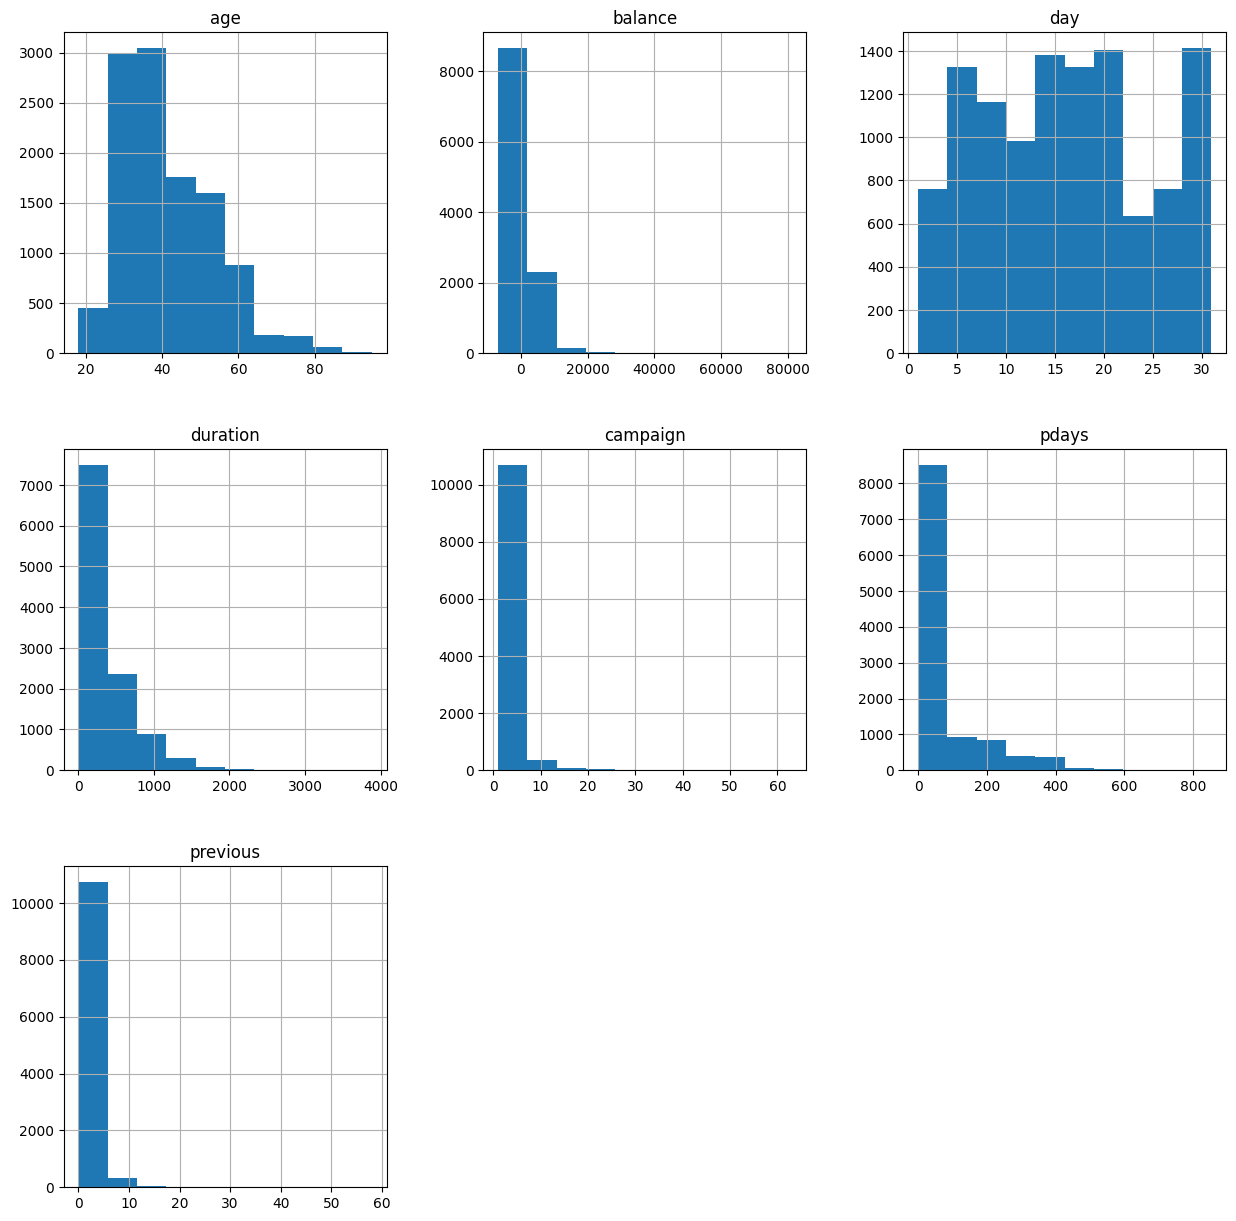

In [22]:
df.hist(figsize =(15 , 15))

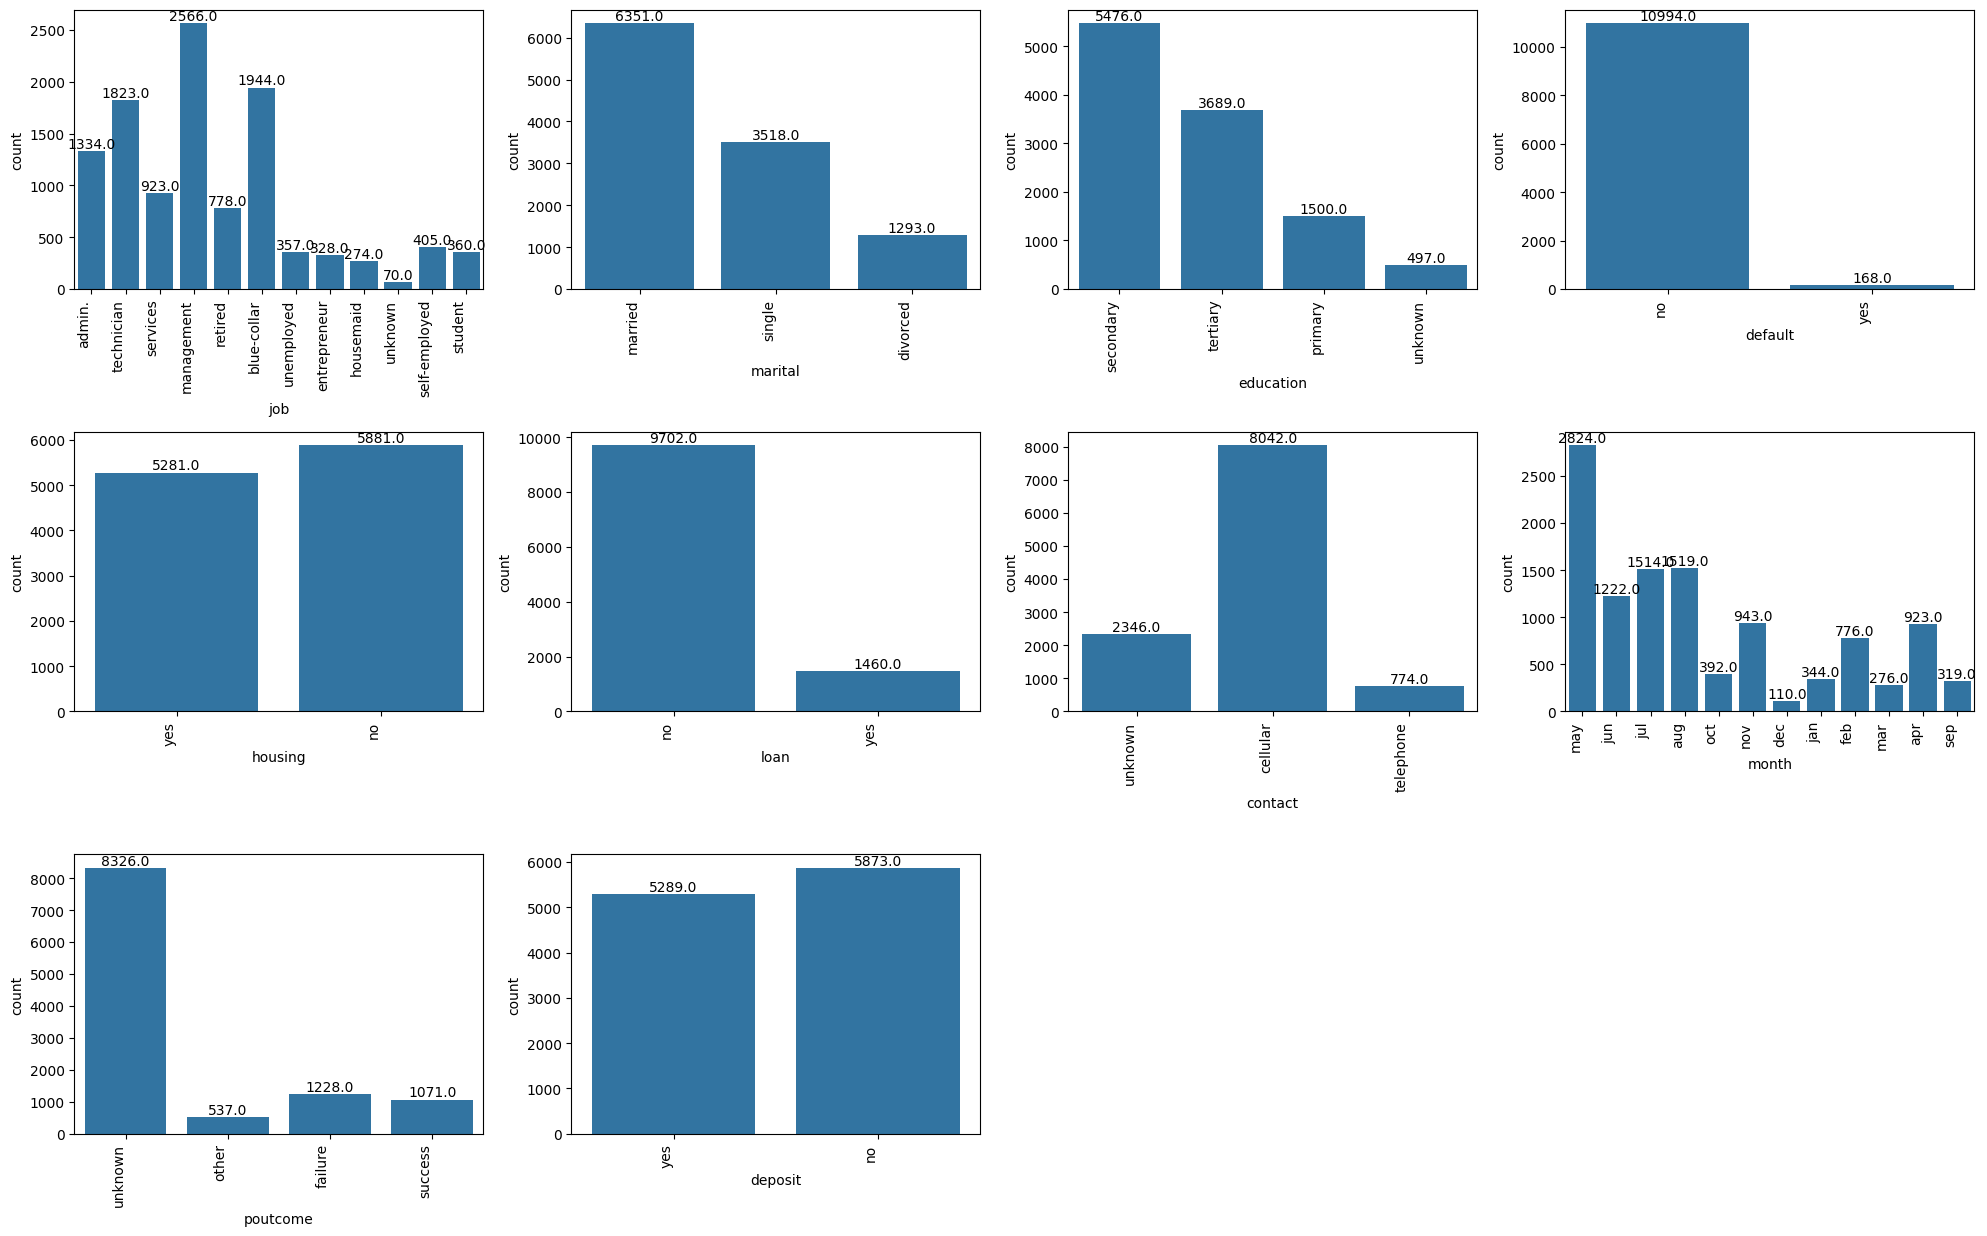

In [23]:
fig = plt.figure(figsize=(20, 20))
for idx, col in enumerate(categ, 1):
    ax = fig.add_subplot(5, 4, idx)
    sns.countplot(x=df[col], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels

    # Add count values on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

most of the bank's clients are secondry. Most of the clients are married  ,The proportion of clients with and without housing loans is roughly similar, have no credit in default or personal loans

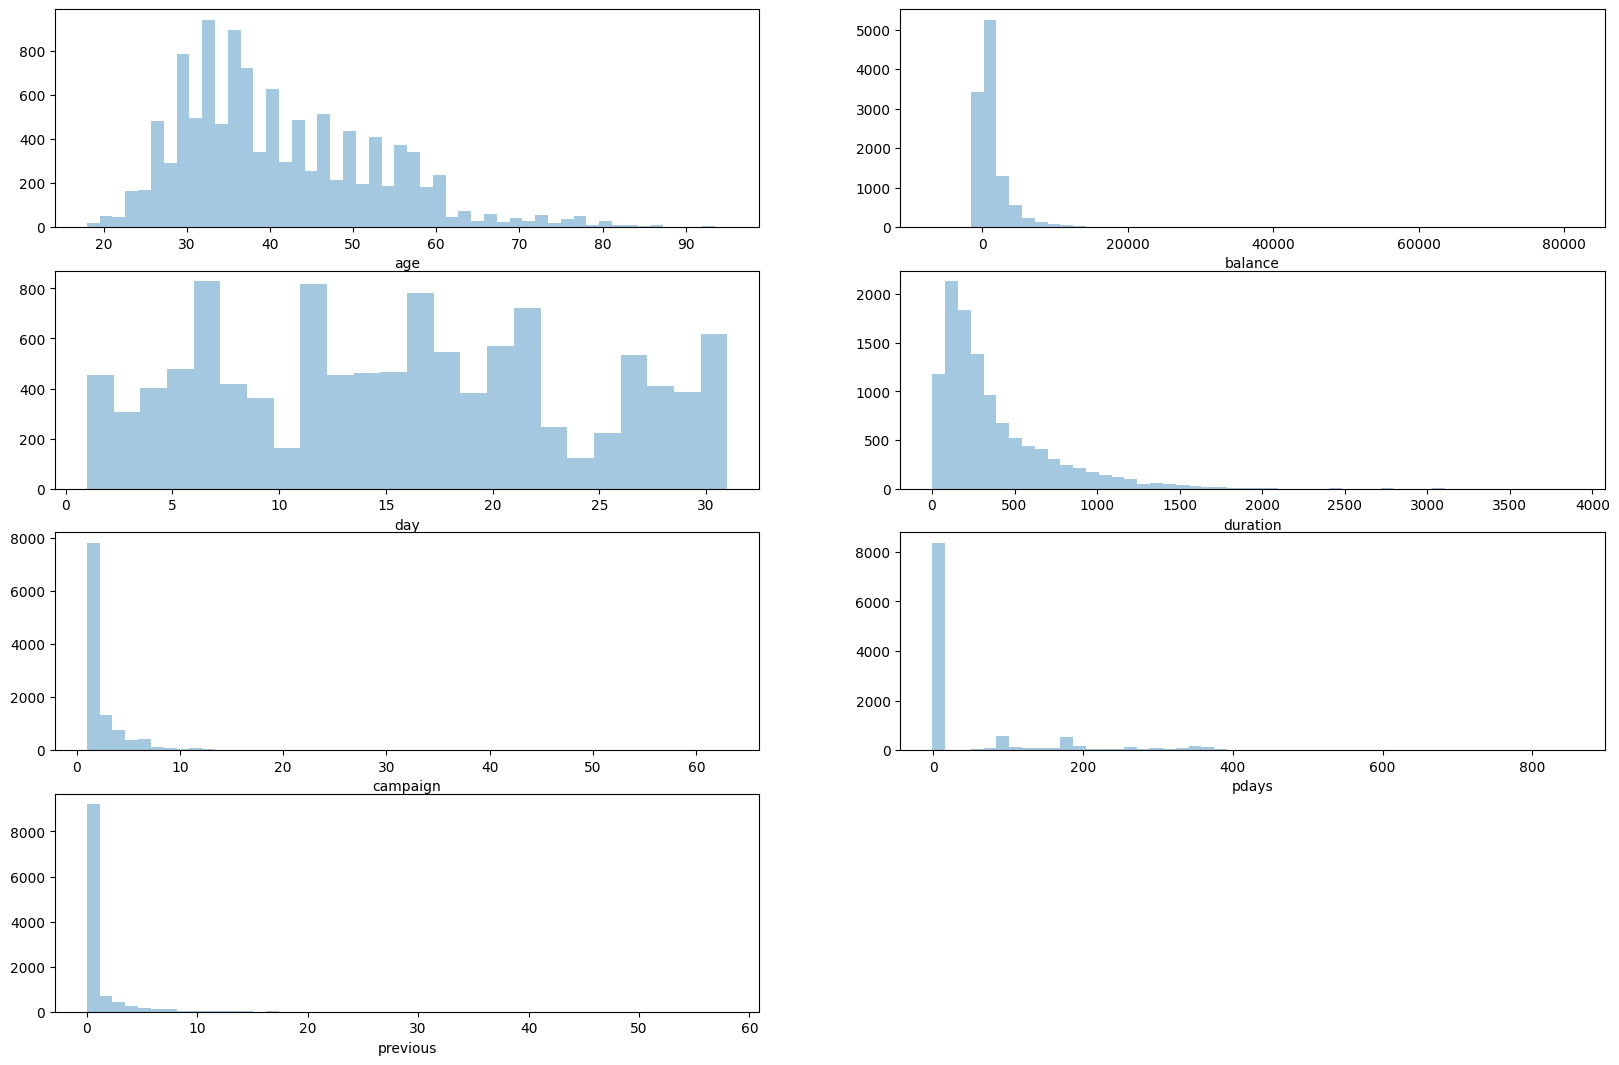

In [24]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df[int_cols].columns):
    ax = plt.subplot(9, 2, i+1)
    sns.distplot(df[col], ax=ax,kde=False)
    plt.xlabel(col)

plt.show()

from the above we concluded
* colums el cont day , balance
* columns categorical contact , poutcome , marital , education
* columns boolean default , loan , housing , deposit

* no missing value in the dataset.
* no duplicates in the dataset.
* outliers at pdays previos and campagin.


<Axes: xlabel='education', ylabel='balance'>

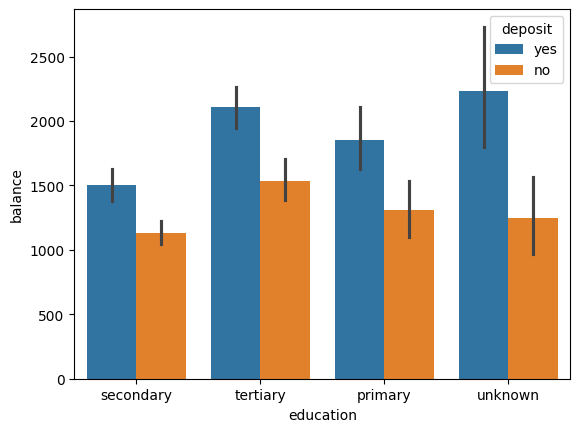

In [25]:
sns.barplot(x="education", y="balance", hue="deposit", data=df)


<Axes: xlabel='poutcome', ylabel='balance'>

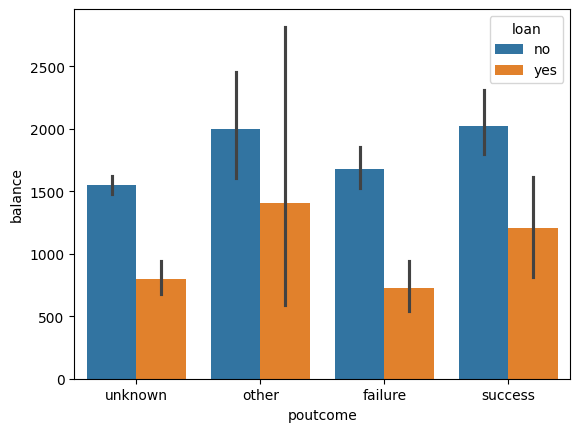

In [26]:
sns.barplot(x="poutcome", y="balance", hue="loan", data=df)

<Axes: xlabel='loan', ylabel='balance'>

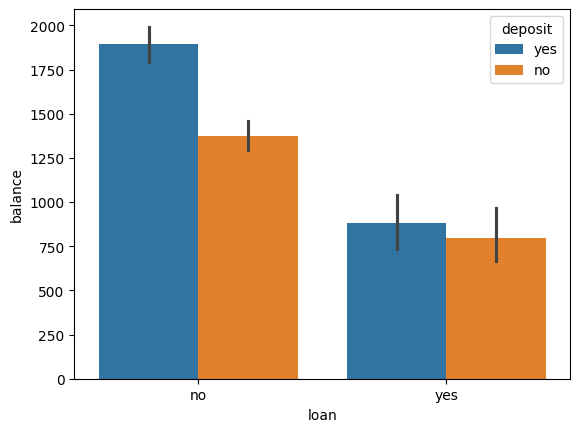

In [27]:
sns.barplot(x="loan", y="balance", hue="deposit", data=df)

el msh by5do qard they have wadi3a which make sense

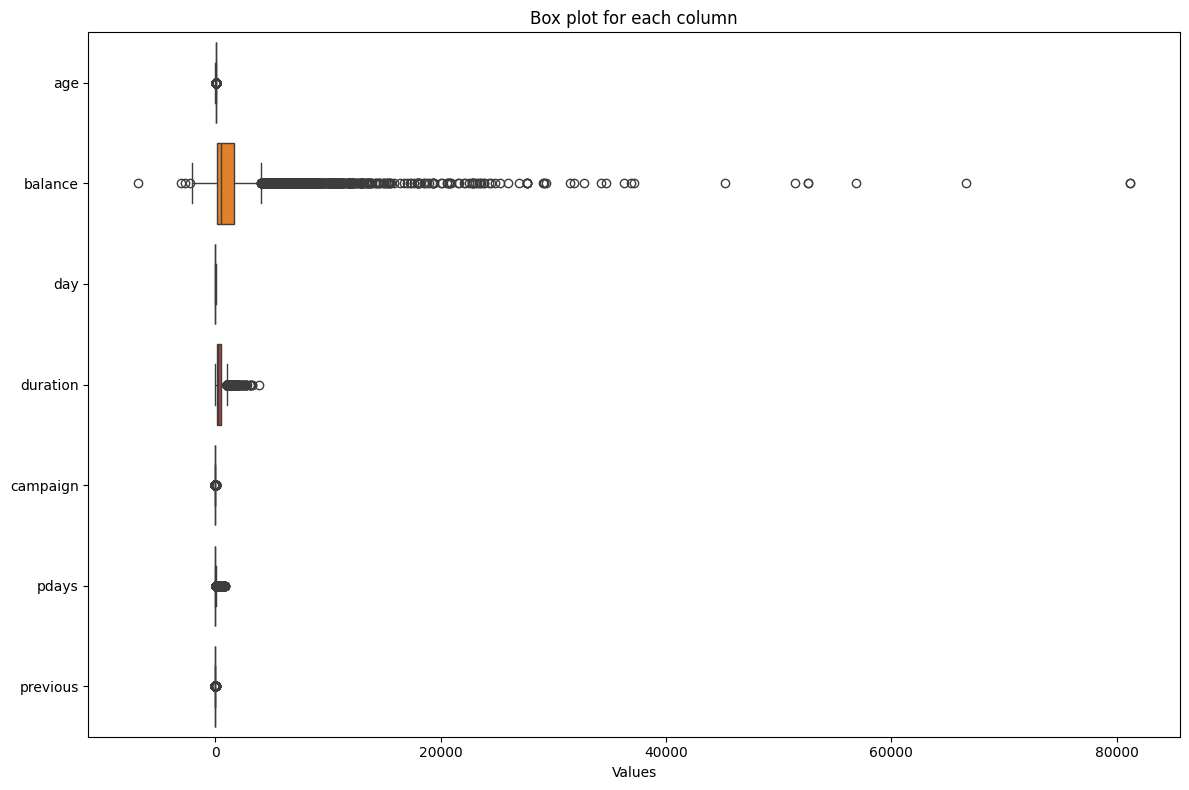

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(df, orient='h')
plt.title('Box plot for each column')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

Text(12000, 400, 'Noise')

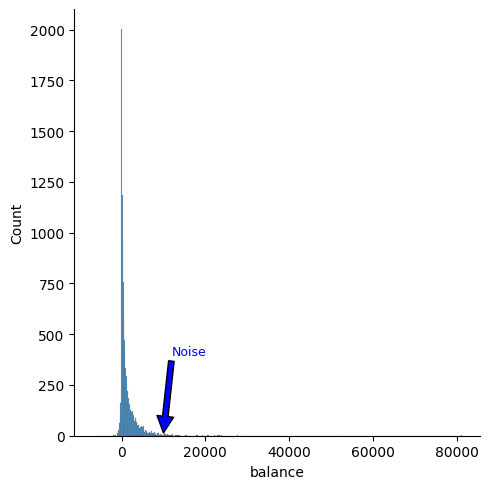

In [29]:
sns.displot(df['balance'], ax=ax,kde=False)
plt.annotate('Noise', xy=(10000,10), xytext=(12000,400), color='blue', fontsize=9,
             arrowprops=dict(facecolor='blue', shrink=0.01))

The bank balances are positively skewed, with most clients having less than 10,000  and some having a lot more.

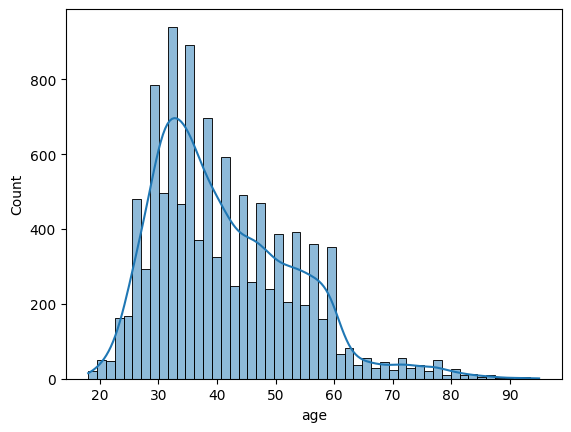

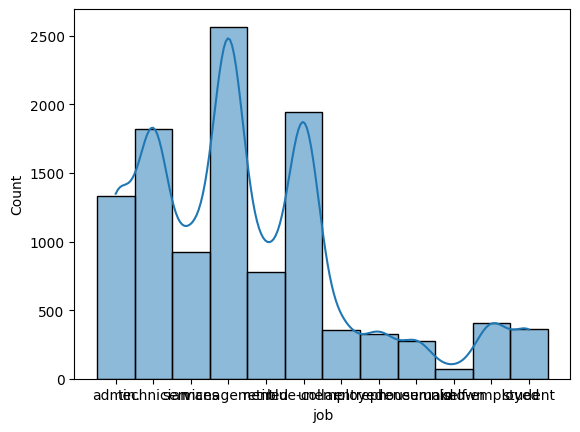

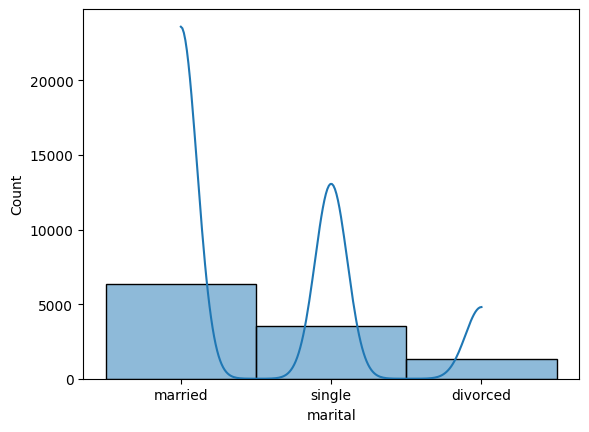

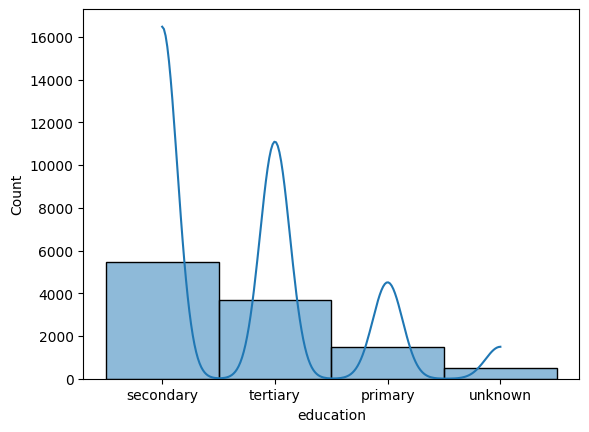

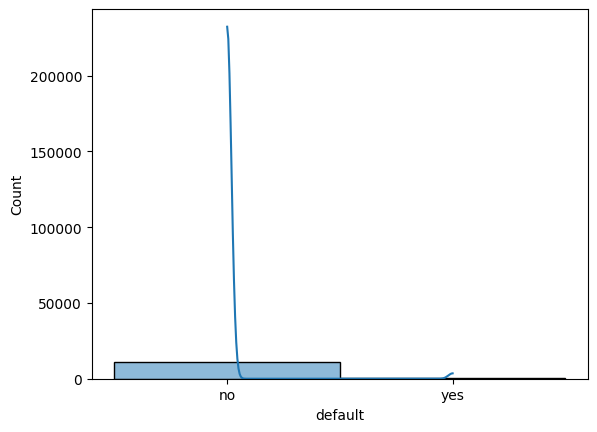

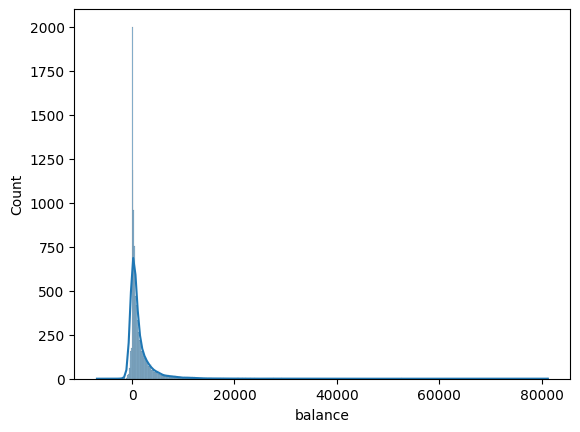

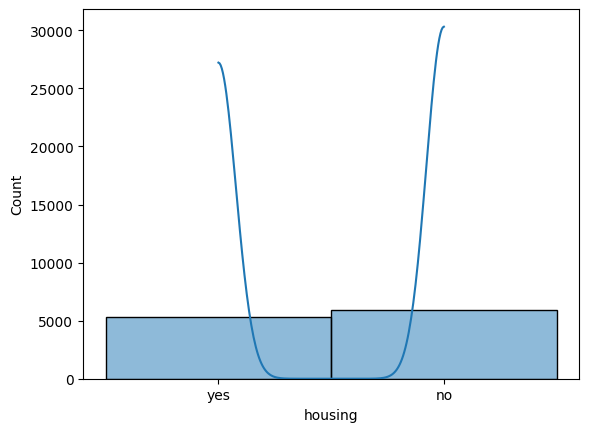

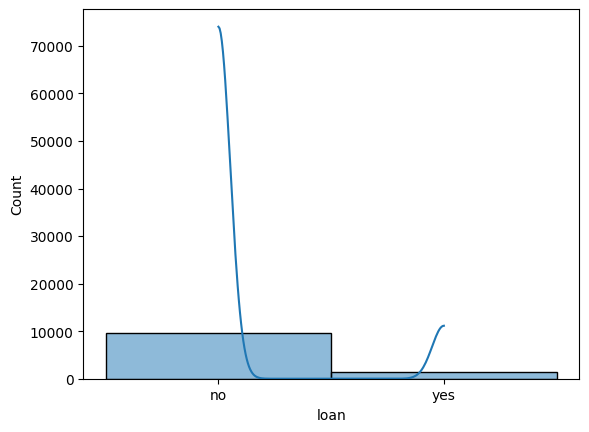

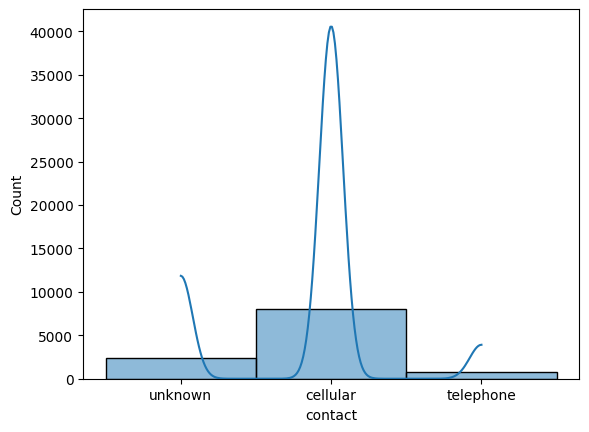

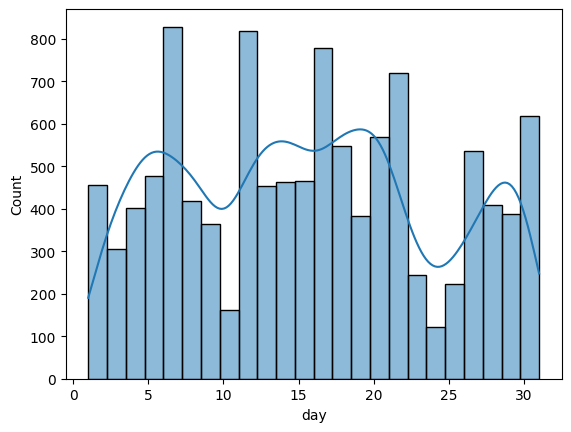

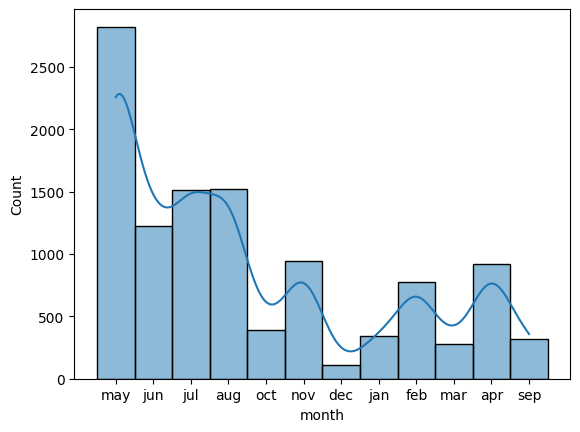

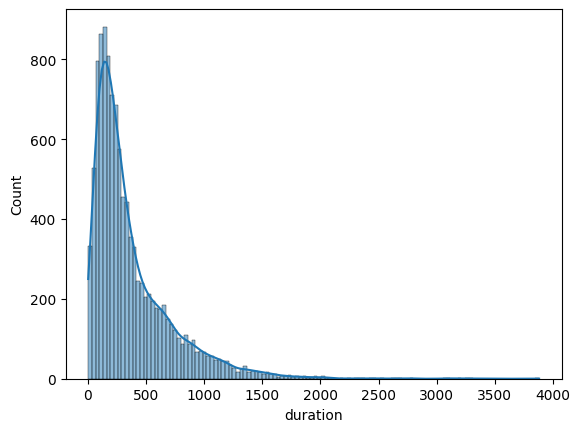

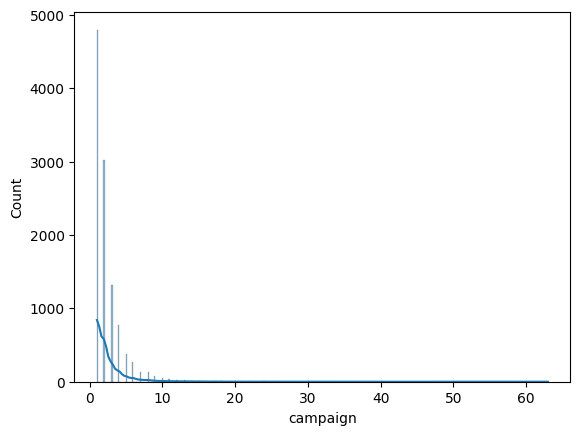

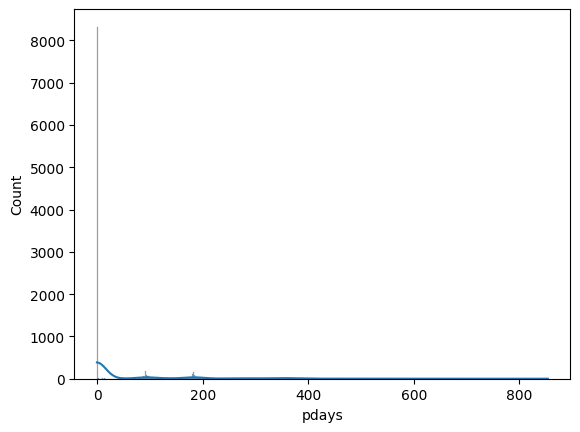

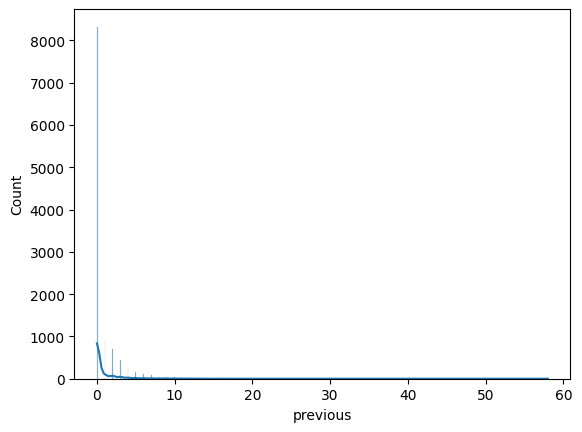

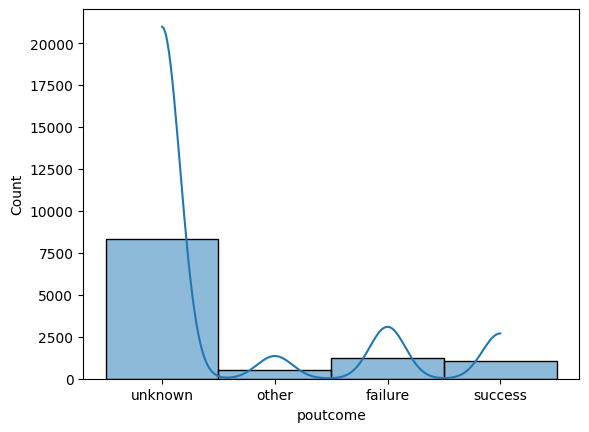

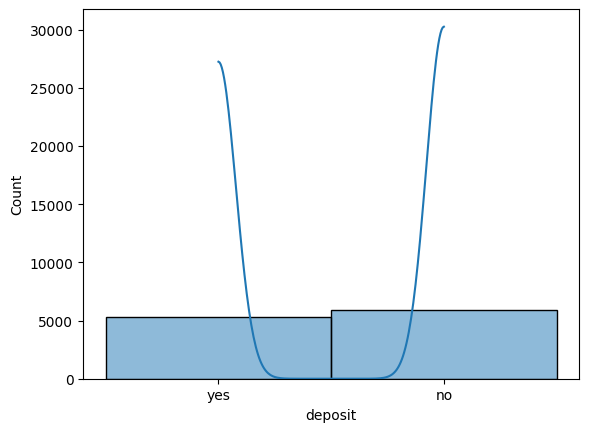

In [30]:
# Checking distribution of columns which have outliers
for col in df.columns:
    sns.histplot(x = df[col], kde=True)
    plt.show()

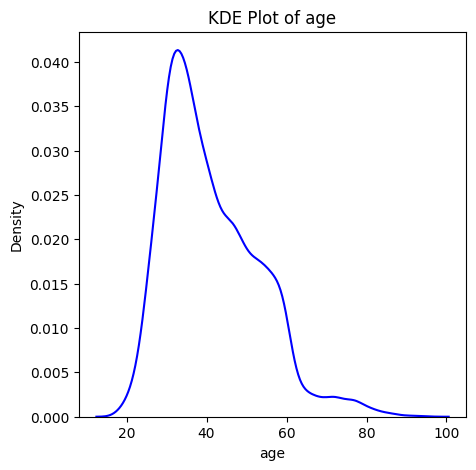

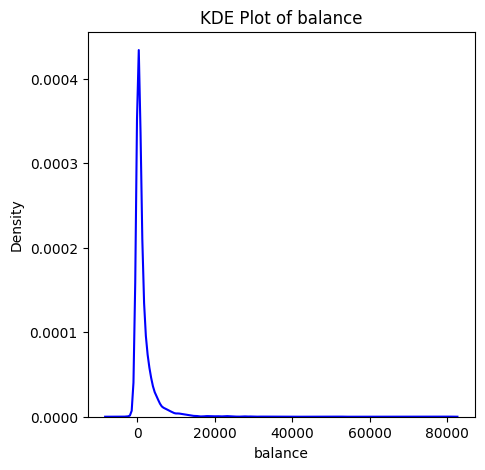

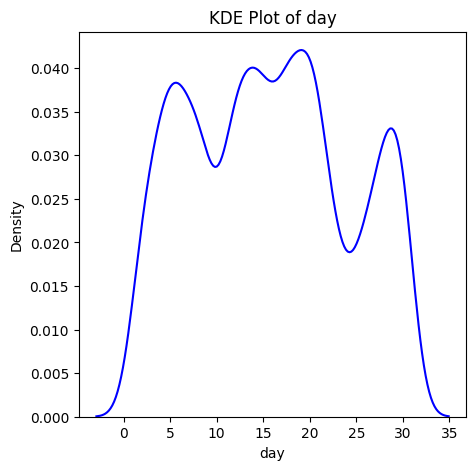

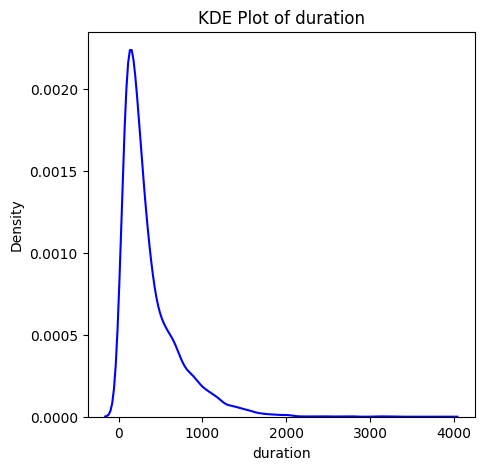

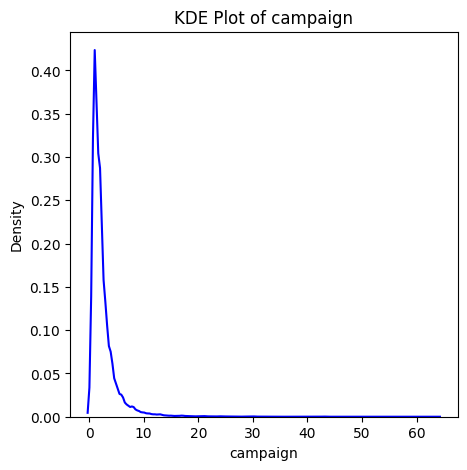

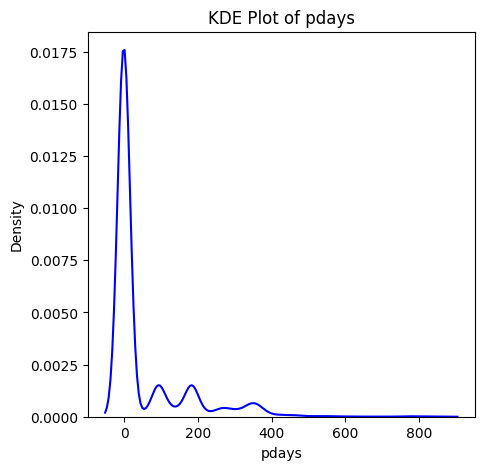

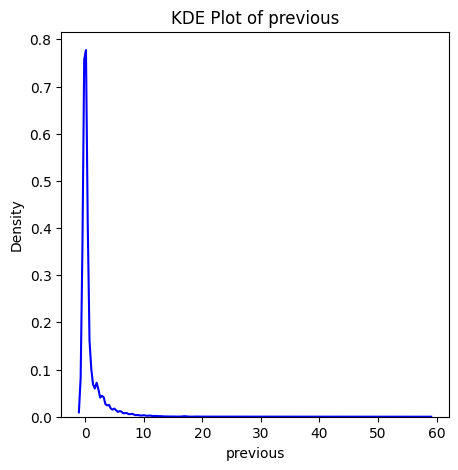

In [31]:
# Filter numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Plot KDE for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(5, 5))
    sns.kdeplot(data=df, x=col, color='blue')
    plt.title(f'KDE Plot of {col}')
    plt.show()
    print("\n")

.Skewness measures the asymmetry of the data distribution. Negative skewness indicates a left-skewed distribution(no -ve skewness in this data only +ve)
.Kurtosis (bt2iis el peak of freq dist)measures the tailedness of the data distribution. Negative kurtosis suggests a distribution with lighter tails than a normal distribution.(day)

In [32]:
statistics = df.describe().transpose()

# Adding skewness and kurtosis to the statistics
statistics['skewness'] = df.skew()
statistics['kurtosis'] = df.kurt()
print(statistics)

            count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  skewness    kurtosis  
age          95.0  0.862780    0.621540  
balance   81204.0  8.224619  126.861303  
day          31.0  0.111330   -1.061324  
duration   3881.0  2.143695    7.301282  
campaign     63.0  5.545578   57.389771  
pdays       854.0  2.449986    6.838359  
previous     58.0  7.335298  106.197826  


# Task 2: Cleaning Data.

## Normalizing data

In [33]:
# scaler = RobustScaler()
# df[int_cols] = scaler.fit_transform(df[int_cols])

# -------------> Robust gives negative values, we should try MinMax
# -------------> or we may shift the values to positive after scaling

## Outliers

### Checking for outliers

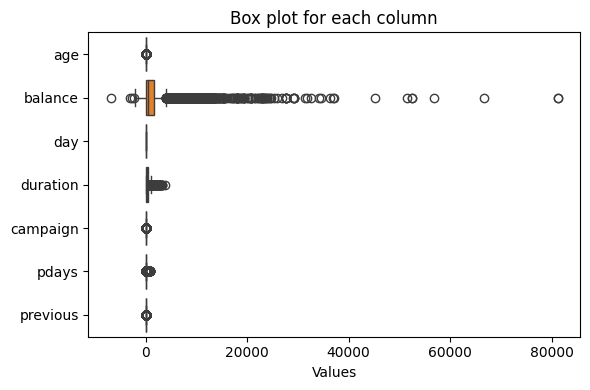

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(df, orient='h')
plt.title('Box plot for each column')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

In [35]:
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [36]:
# Function to identify outliers based on IQR
def find_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)

    return outliers

In [37]:
for column in df.columns:
    # Check if the column is numeric (assuming outliers are relevant for numeric data)
    if pd.api.types.is_numeric_dtype(df[column]):
        outliers = find_outliers(df[column])
        num_outliers = outliers.sum()

        print(f"Number of outliers in '{column}': {num_outliers}")

Number of outliers in 'age': 171
Number of outliers in 'balance': 1055
Number of outliers in 'day': 0
Number of outliers in 'duration': 636
Number of outliers in 'campaign': 601
Number of outliers in 'pdays': 2750
Number of outliers in 'previous': 1258


Based on that, there are alot of outliers in columns -> balance, pdays, prevoius

### Handling outliers

In [38]:
def handle_outliers_iqr(data, columns):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)

        # Calculate IQR
        iqr = q3 - q1

        # Define lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replace outliers with the boundaries of IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

In [39]:
def handle_outliers_zscore(data, columns, threshold=3):
    for column in columns:
        z_scores = (data[column] - data[column].mean()) / data[column].std()

        # Identify outliers based on Z-scores
        outliers = np.abs(z_scores) > threshold

        # Replace outliers with the mean of the column
        data[column] = np.where(outliers, data[column].mean(), data[column])

    return data

In [40]:
# outliers columns
outliers_columms = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Handling outliers using IQR
df_iqr_handled = handle_outliers_iqr(df.copy(), outliers_columms)

# Handling outliers using Z-score
# df_zscore_handled = handle_outliers_zscore(df.copy(), outliers_columms)

# replacing modified data with the original
for c in outliers_columms:
    df[c] = df_iqr_handled[c]

there is no outliers now, and the numeric data is scaled

## Check for duplicate rows

In [41]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Display rows that are duplicates
duplicates_df = df[duplicate_rows]
print(duplicates_df)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, deposit]
Index: []


there is no duplicate rows in the data

## Handling Skewness

In [42]:
# by using log transform, square root transformation, BoxCox transformation (can handle negative and positive values), etc...


## Check normal distribution for the data

In [43]:
# using shapiro or qq plot


## Encoding

# Task 3: Analyze and Visualize insights.

In [44]:
#Bonus Plotly

In [45]:
fig = px.bar(df, x='poutcome', color='loan', title='Count Plot for poutcome with Hue of Loan',
             color_discrete_map={'yes': 'green', 'no': 'red'},
             labels={'poutcome': 'Outcome', 'loan': 'Loan Status'})

# Show the interactive plot
fig.show()

In [46]:
count_data = df.groupby(['poutcome', 'loan']).size().reset_index(name='count')
count_data

,poutcome,loan,count
0,failure,no,1060
1,failure,yes,168
2,other,no,483
3,other,yes,54
4,success,no,1020
5,success,yes,51
6,unknown,no,7139
7,unknown,yes,1187


In [47]:
pivot_data = pd.pivot_table(count_data, values='count', index='poutcome', columns='loan', fill_value=0)

# Calculate the percentage of 'loan=yes' for each 'poutcome' category
pivot_data['percentage_loan_yes'] = (pivot_data['yes'] / (pivot_data['yes'] + pivot_data['no'])) * 100

# Display the resulting DataFrame
print(pivot_data)


loan        no   yes  percentage_loan_yes
poutcome                                 
failure   1060   168            13.680782
other      483    54            10.055866
success   1020    51             4.761905
unknown   7139  1187            14.256546


In [48]:
# Feature engineering

# Task 4: Build Clustering Models.

# Task 5: Analyzing Similarities and Differences Between Cluster Samples